In [48]:
import numpy as np
from qiskit import  QuantumCircuit, BasicAer, transpile
from qiskit.circuit import Parameter
import qutip as qt


In [49]:
a = Parameter('a')
x = Parameter('x')
z = Parameter('z')

circ = QuantumCircuit(1)
circ.rz(-a * np.pi, 0)
circ.rx(x * np.pi, 0)
circ.rz(a * np.pi, 0)
circ.rz(z * np.pi, 0)

In [50]:
n_random = 100
amplitude = 10
random_a = np.random.normal(loc=-1, scale=1, size=n_random)
random_x = np.random.normal(loc=0, scale=amplitude, size=n_random)
random_z = np.random.normal(loc=0, scale=amplitude, size=n_random)
circuits = [
    circ.bind_parameters({a: random_a[i], x: random_x[i], z: random_z[i]})
    for i in range(n_random)
]

backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(circuits, backend))
states = [job.result().get_statevector(circuit) for circuit in circuits]


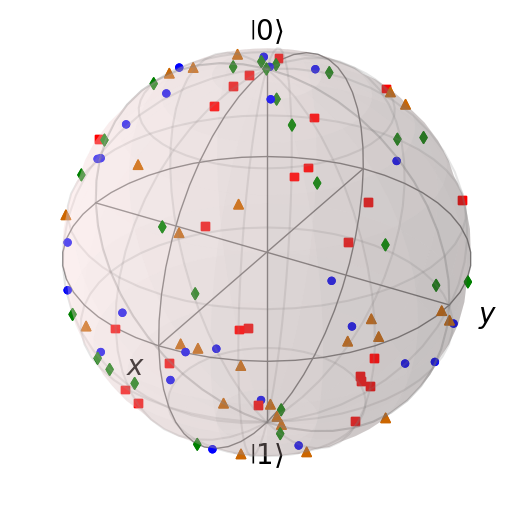

In [51]:
bloch = qt.Bloch()
qobj_states = [qt.Qobj(state) for state in states]
bloch.add_states(qobj_states, kind='point')
bloch.show()